In [1]:
import time
import keras, tensorflow

Using TensorFlow backend.


In [0]:
image_urls = ["https://c1.staticflickr.com/6/5259/5393739840_938b56b479_b.jpg", # strawberry + kiwi
              "https://c1.staticflickr.com/5/4850/31617922037_22c26f0db6_c.jpg",   # salad
              "https://c1.staticflickr.com/4/3422/3757087582_e42cac55f4_b.jpg",
              "https://c1.staticflickr.com/5/4544/39053395052_5b2503930b_b.jpg" # pie
             ]

image_dir = "../data/images/"

import os
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

In [4]:
from urllib.request import urlretrieve

for i, url in enumerate(image_urls):
    filename = image_dir + "img{}.jpg".format(i+1)
    if not os.path.exists(filename):
        try:
            print(urlretrieve (url, filename))
        except (IOError, ValueError) as e:
            print(e)
    else:
        print('found', filename)

('../data/images/img1.jpg', <http.client.HTTPMessage object at 0x7fc98c9639b0>)
('../data/images/img2.jpg', <http.client.HTTPMessage object at 0x7fc98c9639b0>)
('../data/images/img3.jpg', <http.client.HTTPMessage object at 0x7fc99cdb4048>)
('../data/images/img4.jpg', <http.client.HTTPMessage object at 0x7fc99cdb4048>)


In [0]:
from keras.preprocessing.image import load_img, img_to_array

img_files = [f for f in os.listdir(image_dir)]

images224 = [load_img(image_dir+f, target_size=(224, 224)) for f in img_files]
images299 = [load_img(image_dir+f, target_size=(299, 299)) for f in img_files]

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_images(images):
    fig, axs = plt.subplots(1, len(images), figsize=(16,8), subplot_kw={'xticks': [], 'yticks': []})

    for i, img in enumerate(images224):
        axs[i].imshow(img)
        #axs[i].set_axis_off()

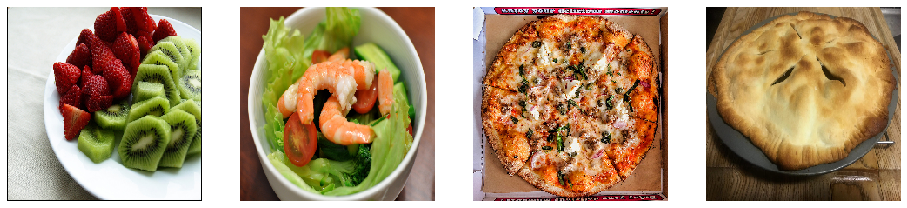

In [7]:

plot_images(images224)

In [0]:
def prepare_img(image):
    image = img_to_array(image)
    image = image.reshape((1,) + image.shape)
    return image

In [0]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input

def predict(model, image):
    image = keras.applications.vgg16.preprocess_input(image)
    yhat = model.predict(image)
    labels = decode_predictions(yhat)
    return labels

def plot_predictions(labels):
    fig, axs = plt.subplots(1, len(labels), sharex=True, figsize=(12,2))

    for i, lab in enumerate(labels):
        categories = [t[1] for t in lab[0]]
        values     = [t[2] for t in lab[0]]
        y_pos      = list(range(0, len(categories)))
        
        axs[i].barh(y_pos, values, color='green')
        axs[i].set_yticks(y_pos)
        axs[i].set_yticklabels(categories)
        axs[i].invert_yaxis()
        axs[i].set_title("{} ({:.2f}%)".format(categories[0], values[0]*100))
    fig.tight_layout()
    plt.show()

In [10]:

from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(include_top=True, weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 20s 0us/step


In [11]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
# warm-up
labels_224 = [predict(model_vgg16, prepare_img(img)) for img in images224]

start_time = time.time()
labels_224 = [predict(model_vgg16, prepare_img(img)) for img in images224]
print("--- took %s seconds ---" % (time.time() - start_time))

40960/35363 [==================================] - 0s 1us/step
--- took 2.6532576084136963 seconds ---


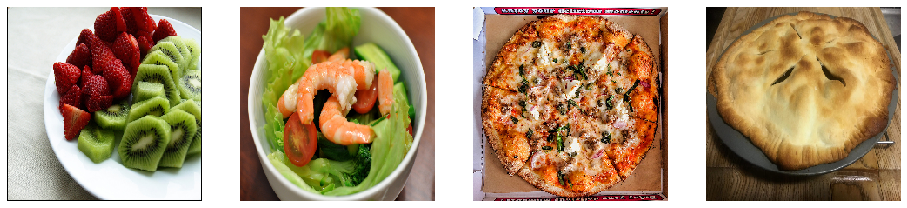

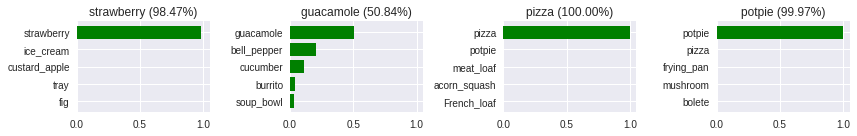

In [13]:
plot_images(images224)
plot_predictions(labels_224)